In [1]:
!pip install pywaterflood

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
import scienceplots
import proxy_crm_modules as pCRM
from IPython.display import display_html

import pywaterflood.pywaterflood as pwf

<h3><b>1. Data Preprocessing</b></h3>
<p>Here, we process data for better understanding of the structure and plan out the things we need to do toward the data.</p>

In [2]:
df = pd.read_excel("D:/crmProject/dataSamples/Volve/volveData.xlsx")
df.head(5)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE,TOTAL_LIQ_VOL
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI,0.0
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP,0.0
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP,0.0
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP,0.0
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

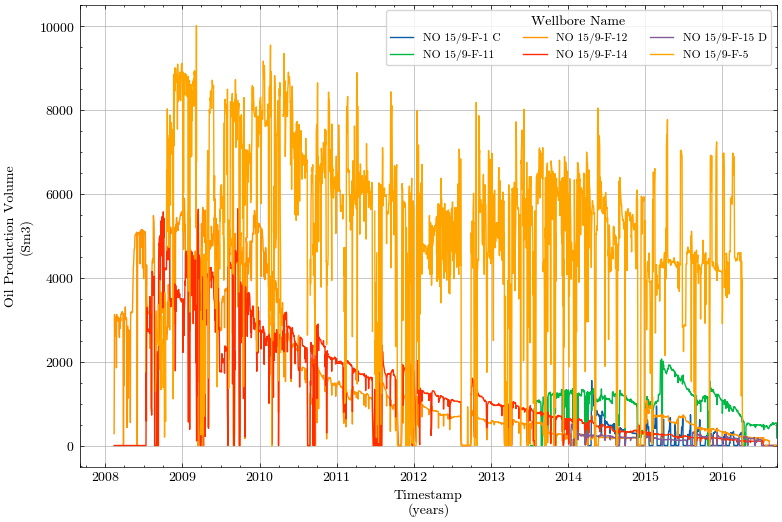

In [4]:
plt.style.use(['science', 'no-latex'])

fig, ax = plt.subplots(figsize=[9,6])
df[df["NPD_WELL_BORE_NAME"]=='15/9-F-1 C'].plot(x='DATEPRD',y='BORE_OIL_VOL',label='NO 15/9-F-1 C',ax=ax)
df[df["NPD_WELL_BORE_NAME"]=='15/9-F-11'].plot(x='DATEPRD',y='BORE_OIL_VOL',label='NO 15/9-F-11',ax=ax)
df[df["NPD_WELL_BORE_NAME"]=='15/9-F-12'].plot(x='DATEPRD',y='BORE_OIL_VOL',label='NO 15/9-F-12',ax=ax)
df[df["NPD_WELL_BORE_NAME"]=='15/9-F-14'].plot(x='DATEPRD',y='BORE_OIL_VOL',label='NO 15/9-F-14',ax=ax)
df[df["NPD_WELL_BORE_NAME"]=='15/9-F-15 D'].plot(x='DATEPRD',y='BORE_OIL_VOL',label='NO 15/9-F-15 D', xlabel='Production Timestamp\n(years)', ylabel='Oil Production Volume\n(Sm3)',ax=ax)

df[df["NPD_WELL_BORE_NAME"]=='15/9-F-5'].plot(x='DATEPRD',y='BORE_WI_VOL', xlabel='Timestamp\n(years)', ylabel='Oil Production Volume\n(Sm3)',c='orange',label='NO 15/9-F-5',ax=ax)
plt.grid(True);plt.legend(title='Wellbore Name', ncol=3, fontsize='small', frameon=True)

plt.show()

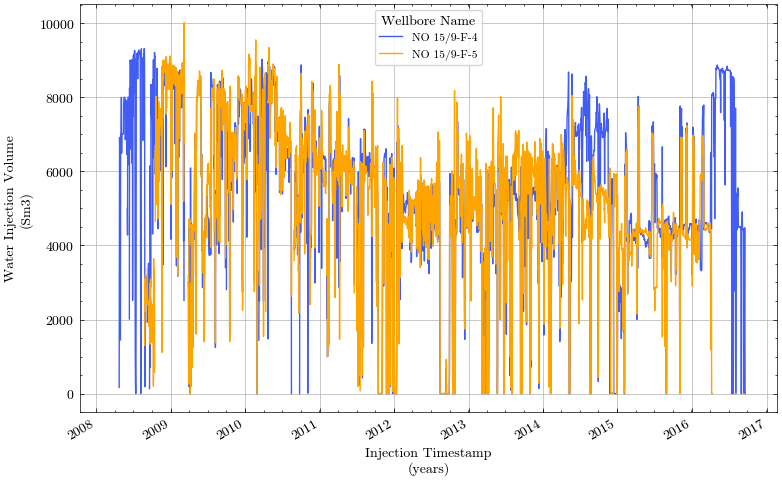

In [5]:
plt.style.use(['science', 'no-latex'])

fig, ax = plt.subplots(figsize=[9,6])
df[df["NPD_WELL_BORE_NAME"]=='15/9-F-4'].plot(x='DATEPRD',y='BORE_WI_VOL',c='#425df5',label='NO 15/9-F-4',ax=ax)
df[df["NPD_WELL_BORE_NAME"]=='15/9-F-5'].plot(x='DATEPRD',y='BORE_WI_VOL', xlabel='Injection Timestamp\n(years)', ylabel='Water Injection Volume\n(Sm3)',c='orange',label='NO 15/9-F-5',ax=ax)
plt.grid(True);plt.legend(title='Wellbore Name', fontsize='small', frameon=True)

plt.show()

<h3><b>2. Data Analysis</b></h3>
<p>This part is needed to clean and sort the data based on the wanted format of data. Some things that we do are:<br><br>
1. Sorting the data based on <b>DATEPRD</b>.<br>
2. Clean the data and fill the NaN with either zeros or other methods.<br>
3. Sort the data based on well names.</p><br>

In [6]:
dfFinal = df.filter(['NPD_WELL_BORE_NAME','DATEPRD','AVG_DOWNHOLE_PRESSURE','BORE_OIL_VOL', 'BORE_GAS_VOL','BORE_WAT_VOL','BORE_WI_VOL'])

dfFinal.head()

,NPD_WELL_BORE_NAME,DATEPRD,AVG_DOWNHOLE_PRESSURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,15/9-F-1 C,2014-04-07,0.00000,0.0,0.0,0.0,NaN
1,15/9-F-1 C,2014-04-08,NaN,0.0,0.0,0.0,NaN
2,15/9-F-1 C,2014-04-09,NaN,0.0,0.0,0.0,NaN
3,15/9-F-1 C,2014-04-10,NaN,0.0,0.0,0.0,NaN
4,15/9-F-1 C,2014-04-11,310.37614,0.0,0.0,0.0,NaN


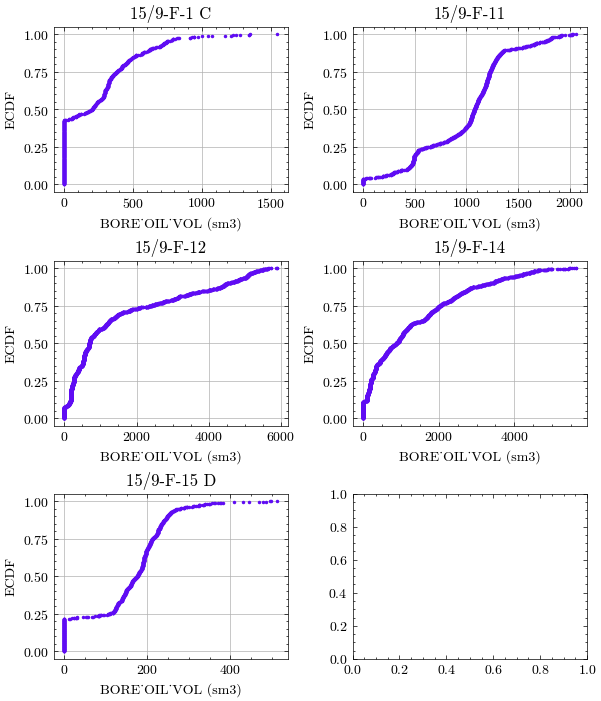

In [7]:
plt.style.use(['science', 'scatter', 'no-latex'])
prodName = ['15/9-F-1 C','15/9-F-11','15/9-F-12','15/9-F-14','15/9-F-15 D']
injName = ['15/9-F-4','15/9-F-5']

# ECDF
def ecdf(x):
    n = len(x)
    x_sorted = np.sort(x)
    y = np.arange(1, n + 1) / n
    return x_sorted, y

fig, axs = plt.subplots(3, 2, figsize=(6, 7), constrained_layout=True)

for j, well_name in enumerate(prodName):
    ax = axs[j // 2, j % 2]
    x, y = ecdf(dfFinal.loc[dfFinal['NPD_WELL_BORE_NAME'] == well_name, 'BORE_OIL_VOL'])
    ax.plot(x, y, marker='.', color='#5f0cf3')
    ax.set_xlabel('BORE_OIL_VOL (sm3)')
    ax.set_ylabel('ECDF')
    ax.set_title(well_name)
    ax.grid()
plt.show()

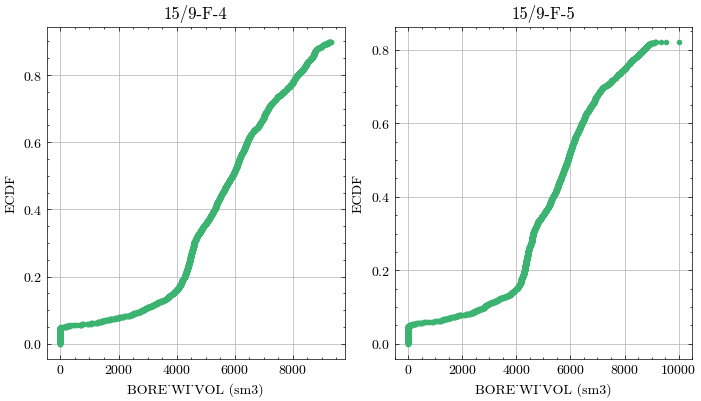

In [8]:
plt.style.use(['science', 'scatter', 'no-latex'])
fig, axs = plt.subplots(1, len(injName), figsize=(7, 4), constrained_layout=True)

for i, well_name in enumerate(injName):
    ax = axs[i]
    x, y = ecdf(dfFinal.loc[dfFinal['NPD_WELL_BORE_NAME'] == well_name, 'BORE_WI_VOL'])
    ax.plot(x, y, color='mediumseagreen')
    ax.set_xlabel('BORE_WI_VOL (sm3)')
    ax.set_ylabel('ECDF')
    ax.set_title(well_name)
    ax.grid()

plt.show()

In [112]:
#create a proper prod, inj, and BHP DataFrame.
#prod DataFrame
filter_prod = dfFinal.filter(['NPD_WELL_BORE_NAME','DATEPRD','BORE_OIL_VOL','BORE_WAT_VOL','BORE_GAS_VOL']) \
    .pivot_table(index='DATEPRD',
                 columns='NPD_WELL_BORE_NAME',
                 values=['BORE_OIL_VOL','BORE_WAT_VOL','BORE_GAS_VOL'],
                 aggfunc='first')

prod = filter_prod.fillna(method='pad') \
    .fillna(0).reset_index()   \
    .rename(columns={'DATEPRD':'time', 
                     '15/9-F-1 C':'P1', 
                     '15/9-F-11':'P2', 
                     '15/9-F-12':'P3', 
                     '15/9-F-14':'P4', 
                     '15/9-F-15 D':'P5',
                     '15/9-F-5':'P6'})

columns_to_drop=[('index',''),('BORE_GAS_VOL','P6'),('BORE_OIL_VOL','P6'),('BORE_WAT_VOL','P6')]
prod = prod.reset_index().drop(columns=columns_to_drop)

prod_cols = ['P1','P2','P3','P4','P5']

for n in prod_cols:
    col_wat = ('BORE_WAT_VOL', n)
    col_oil = ('BORE_OIL_VOL', n)
    col_gas = ('BORE_GAS_VOL', n)
    sum_col = prod[col_wat] + prod[col_oil] + prod[col_gas]
    prod[n] = sum_col
    prod.drop(columns=[col_wat,col_oil,col_gas],inplace=True)

prod = prod.droplevel('NPD_WELL_BORE_NAME',axis=1)

#inj DataFrame
inj = pd.DataFrame()
inj['time'] = dfFinal['DATEPRD'].reset_index().drop('index', axis=1)

for i_inj in range(len(injName)):
    if dfFinal.NPD_WELL_BORE_NAME.isin([injName[i_inj]]).any():
        inj[f'I{i_inj+1}'] = dfFinal['BORE_WI_VOL'].values
inj = inj.fillna(method='pad').fillna(0)

#bhp DataFrame
bhp = dfFinal.filter(['NPD_WELL_BORE_NAME','DATEPRD','AVG_DOWNHOLE_PRESSURE'])\
    .pivot_table(index='DATEPRD',
                 columns='NPD_WELL_BORE_NAME',values='AVG_DOWNHOLE_PRESSURE',
                 aggfunc='first')

bhp = bhp.fillna(method='pad') \
    .fillna(0).reset_index()   \
    .rename_axis(None,axis=1)  \
    .rename(columns={'DATEPRD':'time', 
                     '15/9-F-1 C':'Pressure_P1', 
                     '15/9-F-11':'Pressure_P2', 
                     '15/9-F-12':'Pressure_P3', 
                     '15/9-F-14':'Pressure_P4', 
                     '15/9-F-15 D':'Pressure_P5'})

In [114]:
prod.head()

,time,P1,P2,P3,P4,P5
0,2008-02-12,0.0,0.0,39558.33,0.0,0.0
1,2008-02-13,0.0,0.0,287122.99,0.0,0.0
2,2008-02-14,0.0,0.0,513080.13,0.0,0.0
3,2008-02-15,0.0,0.0,386035.92,0.0,0.0
4,2008-02-16,0.0,0.0,421530.69,0.0,0.0


In [115]:
inj = inj.sort_values(by='time').reset_index().drop('index',axis=1)
prod = prod.sort_values(by='time').reset_index().drop(['index',],axis=1)
bhp = bhp.sort_values(by='time').reset_index().drop('index',axis=1)

In [116]:
prod = prod.groupby('time').sum().reset_index()
inj = inj.groupby('time').sum().reset_index()
bhp = bhp.groupby('time').sum().reset_index()

In [117]:
min_time = prod['time'].min()

prod['time']=(prod['time'] - min_time).dt.days.astype(int)
inj['time']=(inj['time'] - min_time).dt.days.astype(int)
bhp['time']=(bhp['time'] - min_time).dt.days.astype(int)

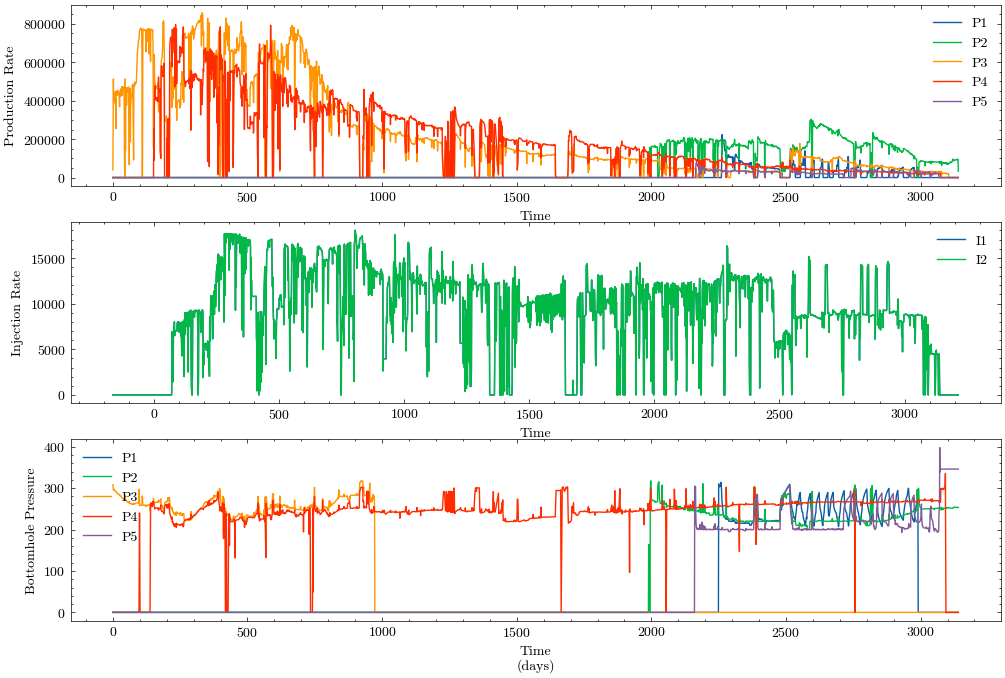

In [122]:
plt.style.use(['science', 'no-latex'])
fig, ax = plt.subplots(3,1, figsize=(12,8))

for j in range(1, prod.shape[1]):
  ax[0].plot(prod['time'], prod[f'P{j}'], label=f'P{j}')
  ax[2].plot(bhp['time'], bhp[f'Pressure_P{j}'], label=f'P{j}')

ax[0].set_xlabel('Time\n(days)')
ax[0].set_ylabel('Production Rate')
ax[0].legend()

for i in range(1, inj.shape[1]):
  ax[1].plot(inj['time'], inj[f'I{i}'], label=f'I{i}')

ax[1].set_xlabel('Time\n(days)')
ax[1].set_ylabel('Injection Rate')
ax[1].legend()

ax[2].set_xlabel('Time\n(days)')
ax[2].set_ylabel('Bottomhole Pressure')
ax[2].legend()

plt.show()

In [18]:
prod_style = prod.head(10).style.set_table_attributes("style='display:inline'").format(precision=2).hide(level=100).set_caption('Well Production')
inj_style = inj.head(10).style.set_table_attributes("style='display:inline'").format(precision=2).hide(level=100).set_caption('Well Injection')
bhp_style = bhp.head(10).style.set_table_attributes("style='display:inline'").format(precision=2).hide(level=100).set_caption('Bottomhole Pressure')

display_html(prod_style._repr_html_()+inj_style._repr_html_()+bhp_style._repr_html_(), raw=True)

,time,P1,P2,P3,P4,P5
0,0,0.00,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00,0.00
2,2,0.00,0.00,0.00,0.00,0.00
3,3,0.00,0.00,0.00,0.00,0.00
4,4,0.00,0.00,0.00,0.00,0.00
5,5,0.00,0.00,0.00,0.00,0.00
6,6,0.00,0.00,0.00,0.00,0.00
7,7,0.00,0.00,0.00,0.00,0.00
8,8,0.00,0.00,0.00,0.00,0.00
9,9,0.00,0.00,0.00,0.00,0.00


<h3><b>Apply CRM Model</b></h3>
<p>In this part, there are several cases that will be tackled using proxy-CRM model from proxyCRM_modules:<br><br>
1. <b>Case 1</b>: No shut-in well case.<br>
2. <b>Case 2</b>: One and multiple shut-in case.<br>
3. <b>Case 3</b>: One and multiple shut-in and well treatment case.</p><br>

In [19]:
train_size = int(0.875 * prod.shape[0])

In [20]:
time = prod['time']
prod = prod.drop(columns='time')
inj = inj.drop(columns='time')
bhp = bhp.drop(columns='time')

In [21]:
inj_train = inj.values[:train_size]
prod_train = prod.values[:train_size]
time_train = time.values[:train_size].astype(float)
bhp_train = bhp.values[:train_size]

inj_test = inj.values[train_size:]
prod_test = prod.values[train_size:]
time_test = time.values[train_size:]
press_test = bhp.values[train_size:]

In [22]:
proxy_crm = pCRM.proxyCRM()

In [23]:
proxy_crm.fit(prod_train, inj_train, bhp_train, time_train, num_cores=4)

In [25]:
q_hat_train = proxy_crm.predict()
q_hat_test = proxy_crm.predict(inj=inj_test, time=time_test.astype(float))

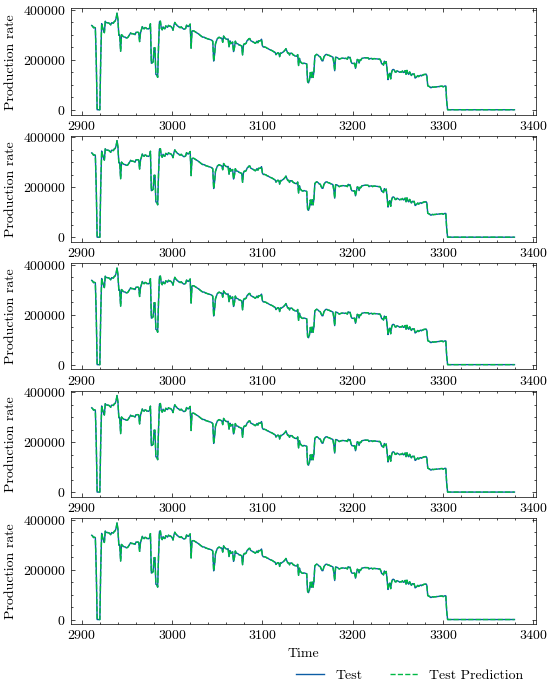

In [41]:
plt.style.use(['science', 'no-latex'])

fig, axes = plt.subplots(len(prod.columns), figsize=(6, 8), sharey=True)
for i, p in enumerate(prod):
    axes[i].plot(time_train, prod_train[:,p], label=f"Train")
    axes[i].plot(time_test, prod_test[:,p], label=f"Test")
    axes[i].plot(time_train, q_hat_train[:,p], ls="--", label=f"Train Prediction")
    axes[i].plot(time_test, q_hat_test[:,p], ls="--", label=f"Test Prediction")
    axes[i].set(xlim=(0, None), ylim=(0, None), ylabel="Production rate")
    axes[i].annotate(f"Producer {p}", xy=(7000, 100))
axes[i].set(xlabel="Time")
legend = axes[i].legend(bbox_to_anchor =(1, -0.3), ncol=4)

In [37]:
connectivity = pd.DataFrame(
    proxy_crm.lambda_ip,
    index=prod.columns.rename("Producer"),
    columns=inj.columns.rename("Injector"),
)
connectivity.T.style.highlight_max(color='blue').format("{:.2}")

Producer,0,1,2,3,4
Injector,,,,,
I1,0.5,0.5,0.5,0.5,0.5
I2,0.5,0.5,0.5,0.5,0.5


In [39]:
def rmse(test, pred):
  original_rmse = np.sqrt(((test-pred)**2/len(test)).sum())
  return original_rmse

result=[]
for j in range(prod.shape[1]):
  result.append(np.array(rmse(prod_test[:,j], q_hat_test[:,j])))

print(np.array(result))

[0.00119148 0.00119284 0.0011937  0.00119284 0.00049843]
